In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)

co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)

In [3]:
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [4]:
co2_br_merge = pd.merge(co2_df, birthrate_df, on="country")
co2_br_merge.head()

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [5]:
co2_br_rename = co2_br_merge.rename(columns={"country": "Country",
                                             "1924_x": "1924 CO2 Emissions",
                                             "1934_x": "1934 CO2 Emissions",
                                             "1944_x": "1944 CO2 Emissions",
                                             "1954_x": "1954 CO2 Emissions",
                                             "1964_x": "1964 CO2 Emissions",
                                             "1924_y": "Birthrate_1924",
                                             "1934_y": "Birthrate_1934",
                                             "1944_y": "Birthrate_1944",
                                             "1954_y": "Birthrate_1954",
                                             "1964_y": "Birthrate_1964"})

co2_br_rename.head()

,Country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [6]:
co2_br_df = co2_br_rename[["Country", "1924 CO2 Emissions", "1934 CO2 Emissions", "1944 CO2 Emissions", "1954 CO2 Emissions", "1964 CO2 Emissions",
                           "Birthrate_1924", "Birthrate_1934", "Birthrate_1944", "Birthrate_1954", "Birthrate_1964"]]
co2_br_df.head()

,Country,1924 CO2 Emissions,1934 CO2 Emissions,1944 CO2 Emissions,1954 CO2 Emissions,1964 CO2 Emissions,Birthrate_1924,Birthrate_1934,Birthrate_1944,Birthrate_1954,Birthrate_1964
0,Afghanistan,NaN,NaN,NaN,0.0131,0.0863,7.00,7.24,7.46,7.53,7.45
1,Albania,NaN,0.00707,0.1320,0.3630,1.0900,4.60,3.78,4.79,6.37,5.96
2,Algeria,0.0046,0.01930,0.0608,0.4330,0.4600,6.99,7.22,7.41,7.41,7.67
3,Angola,NaN,NaN,NaN,0.0696,0.2010,7.02,6.99,7.04,7.20,7.61
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,1.5400,4.54,4.51,4.47,4.53,4.25


In [7]:
df_1924 = co2_br_df[["Country", "1924 CO2 Emissions", "Birthrate_1924"]].sort_values("1924 CO2 Emissions", ascending=False).reset_index()
df_1924 = df_1924[["Country", "1924 CO2 Emissions", "Birthrate_1924"]].dropna()
df_1924

,Country,1924 CO2 Emissions,Birthrate_1924
0,United States,14.6000,3.12
1,United Kingdom,10.6000,2.28
2,Belgium,9.9000,2.57
3,Canada,8.2700,3.22
4,Germany,7.0400,2.42
...,...,...,...
57,Colombia,0.0279,6.44
58,Ecuador,0.0228,7.05
59,"Congo, Dem. Rep.",0.0212,5.99
60,Philippines,0.0083,5.99


Text(0, 0.5, 'Birthrate (children per women)')

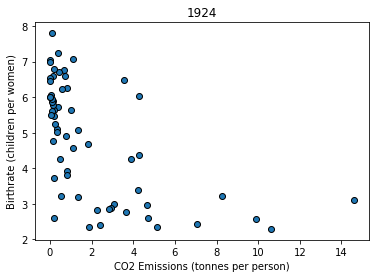

In [8]:
x_values = df_1924["1924 CO2 Emissions"]
y_values = df_1924["Birthrate_1924"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("1924")
plt.xlabel("CO2 Emissions (tonnes per person)")
plt.ylabel("Birthrate (children per women)")

In [9]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

0     0.746852
1     2.040284
2     2.266634
3     2.793707
4     3.191437
        ...   
57    5.458855
58    5.460504
59    5.461021
60    5.465192
61    5.466389
Name: 1924 CO2 Emissions, Length: 62, dtype: float64

In [10]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.32x + 5.47


The r value is : -0.5880236924207715
The r squared value is : 0.34577186284815803


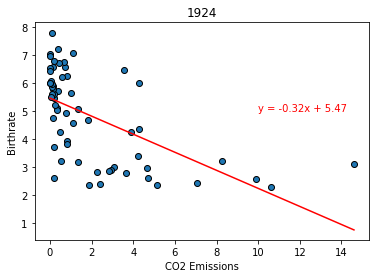

In [11]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title('1924')
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(10,5),fontsize=10,color="red")

print(f"The r value is : {rvalue}")
rsquared = rvalue * rvalue
print(f"The r squared value is : {rsquared}")

#plt.savefig("Images","1924_co2_v_birthrate.png")

plt.show()

In [12]:
df_1934 = co2_br_df[["Country", "1934 CO2 Emissions", "Birthrate_1934"]].sort_values("1934 CO2 Emissions", ascending=False).reset_index()
df_1934 = df_1934[["Country", "1934 CO2 Emissions", "Birthrate_1934"]].dropna()
df_1934

,Country,1934 CO2 Emissions,Birthrate_1934
0,United States,11.10000,2.07
1,Trinidad and Tobago,10.90000,4.23
2,Belgium,9.08000,2.04
3,United Kingdom,9.06000,1.76
4,Canada,7.28000,2.80
...,...,...,...
74,Tunisia,0.00670,6.30
75,Syria,0.00408,6.97
76,Madagascar,0.00201,7.04
77,Thailand,0.00183,6.27


Text(0, 0.5, 'Birthrate (children per women)')

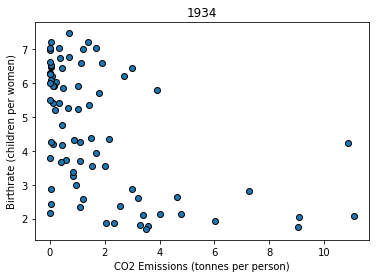

In [13]:
x_values = df_1934["1934 CO2 Emissions"]
y_values = df_1934["Birthrate_1934"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("1934")
plt.xlabel("CO2 Emissions (tonnes per person)")
plt.ylabel("Birthrate (children per women)")

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

0     1.050295
1     1.125874
2     1.813648
3     1.821206
4     2.493864
        ...   
74    5.242428
75    5.243418
76    5.244201
77    5.244269
78    5.244325
Name: 1934 CO2 Emissions, Length: 79, dtype: float64

In [15]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.38x + 5.24


The r value is : -0.507299889518464
The r squared value is : 0.2573531779054458


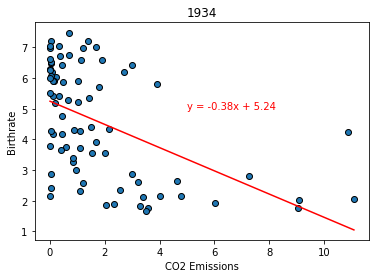

In [17]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title('1934')
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(5,5),fontsize=10,color="red")

print(f"The r value is : {rvalue}")
rsquared = rvalue * rvalue
print(f"The r squared value is : {rsquared}")

#plt.savefig("Images","1934_co2_v_birthrate.png")

plt.show()

In [18]:
df_1944 = co2_br_df[["Country", "1944 CO2 Emissions", "Birthrate_1944"]].sort_values("1944 CO2 Emissions", ascending=False).reset_index()
df_1944 = df_1944[["Country", "1944 CO2 Emissions", "Birthrate_1944"]].dropna()
df_1944

,Country,1944 CO2 Emissions,Birthrate_1944
0,Brunei,64.80000,7.41
1,Bahrain,25.80000,7.02
2,Trinidad and Tobago,19.70000,5.16
3,United States,17.30000,2.44
4,Canada,11.50000,3.00
...,...,...,...
76,Mozambique,0.00943,6.69
77,Syria,0.00588,7.10
78,Guatemala,0.00431,6.48
79,Nicaragua,0.00342,6.60


Text(0, 0.5, 'Birthrate (children per women)')

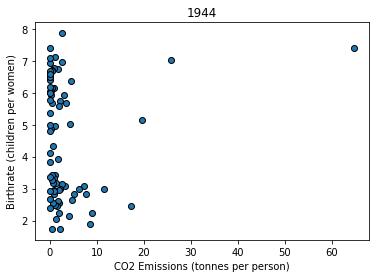

In [19]:
x_values = df_1944["1944 CO2 Emissions"]
y_values = df_1944["Birthrate_1944"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("1944")
plt.xlabel("CO2 Emissions (tonnes per person)")
plt.ylabel("Birthrate (children per women)")

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

0     5.663199
1     4.963855
2     4.854471
3     4.811434
4     4.707429
        ...   
76    4.501382
77    4.501318
78    4.501290
79    4.501274
80    4.501228
Name: 1944 CO2 Emissions, Length: 81, dtype: float64

In [21]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.02x + 4.5


The r value is : 0.08115457631344145
The r squared value is : 0.006586065256614191


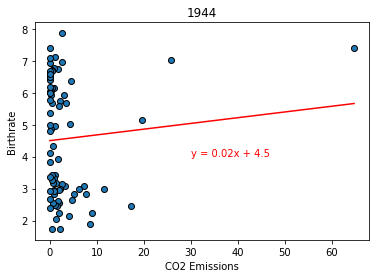

In [22]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title('1944')
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(30,4),fontsize=10,color="red")

print(f"The r value is : {rvalue}")
rsquared = rvalue * rvalue
print(f"The r squared value is : {rsquared}")

#plt.savefig("Images","1944_co2_v_birthrate.png")

plt.show()

In [23]:
df_1954 = co2_br_df[["Country", "1954 CO2 Emissions", "Birthrate_1954"]].sort_values("1954 CO2 Emissions", ascending=False).reset_index()
df_1954 = df_1954[["Country", "1954 CO2 Emissions", "Birthrate_1954"]].dropna()
df_1954

,Country,1954 CO2 Emissions,Birthrate_1954
0,Luxembourg,29.00000,2.06
1,Qatar,17.90000,6.97
2,United States,14.70000,3.49
3,United Kingdom,10.90000,2.26
4,Canada,10.70000,3.78
...,...,...,...
132,Ethiopia,0.01390,7.05
133,Afghanistan,0.01310,7.53
134,Guinea-Bissau,0.01290,6.05
135,Swaziland,0.01220,6.69


Text(0, 0.5, 'Birthrate (children per women)')

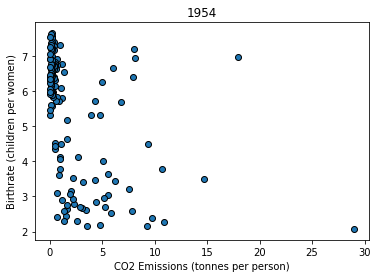

In [24]:
x_values = df_1954["1954 CO2 Emissions"]
y_values = df_1954["Birthrate_1954"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("1954")
plt.xlabel("CO2 Emissions (tonnes per person)")
plt.ylabel("Birthrate (children per women)")

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

0      0.155293
1      2.307784
2      2.928321
3      3.665210
4      3.703993
         ...   
132    5.776221
133    5.776376
134    5.776415
135    5.776550
136    5.778061
Name: 1954 CO2 Emissions, Length: 137, dtype: float64

In [26]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.19x + 5.78


The r value is : -0.43450674496565883
The r squared value is : 0.18879611142065209


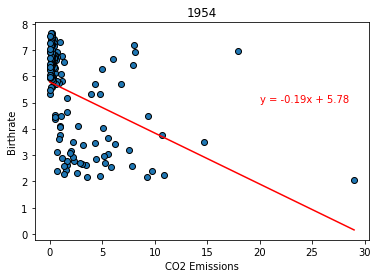

In [27]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title('1954')
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=10,color="red")

print(f"The r value is : {rvalue}")
rsquared = rvalue * rvalue
print(f"The r squared value is : {rsquared}")

#plt.savefig("Images","1954_co2_v_birthrate.png")

plt.show()

In [28]:
df_1964 = co2_br_df[["Country", "1964 CO2 Emissions", "Birthrate_1964"]].sort_values("1964 CO2 Emissions", ascending=False).reset_index()
df_1964 = df_1964[["Country", "1964 CO2 Emissions", "Birthrate_1964"]].dropna()
df_1964

,Country,1964 CO2 Emissions,Birthrate_1964
0,Qatar,92.9000,6.99
1,Kuwait,59.6000,7.38
2,Luxembourg,37.6000,2.37
3,United States,16.5000,3.22
4,Germany,12.8000,2.50
...,...,...,...
160,Oman,0.0181,7.26
161,Ethiopia,0.0167,6.87
162,Burundi,0.0158,7.14
163,Nepal,0.0140,5.97


Text(0, 0.5, 'Birthrate (children per women)')

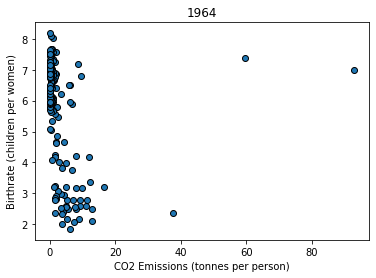

In [40]:
x_values = df_1964["1964 CO2 Emissions"]
y_values = df_1964["Birthrate_1964"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("1964")
plt.xlabel("CO2 Emissions (tonnes per person)")
plt.ylabel("Birthrate (children per women)")

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

0      2.407077
1      3.577845
2      4.351326
3      5.093164
4      5.223250
         ...   
160    5.672638
161    5.672688
162    5.672719
163    5.672782
164    5.672867
Name: 1964 CO2 Emissions, Length: 165, dtype: float64

In [31]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.04x + 5.67


The r value is : -0.185239973747555
The r squared value is : 0.034313847873994864


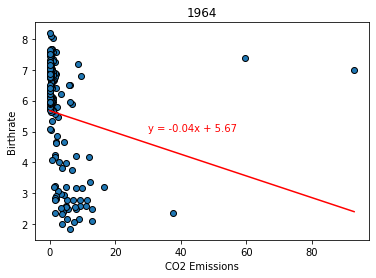

In [32]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title('1964')
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(30,5),fontsize=10,color="red")

print(f"The r value is : {rvalue}")
rsquared = rvalue * rvalue
print(f"The r squared value is : {rsquared}")

#plt.savefig("Images","1964_co2_v_birthrate.png")

plt.show()

In [ ]:
#ran regression on each 10 year period between 1924-1964, although not strong, CO2 emission and birthrate seem to have a negative correlation based on the rvalue. Looking at rsquared, it's not statistically significant to predict birthrate based on CO2 emission.

In [33]:
df_1924.describe()

,1924 CO2 Emissions,Birthrate_1924
count,62.000000,62.000000
mean,1.975158,4.829194
std,2.925108,1.608535
min,0.004600,2.280000
25%,0.173250,3.190000
50%,0.705500,5.090000
75%,2.920000,6.057500
max,14.600000,7.810000


In [34]:
bins = [0, 5, 10, 15]
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [35]:
pd.cut(df_1924["1924 CO2 Emissions"], bins, labels=group_labels)

0     High-Level CO2
1     High-Level CO2
2      Mid-Level CO2
3      Mid-Level CO2
4      Mid-Level CO2
           ...      
57     Low-Level CO2
58     Low-Level CO2
59     Low-Level CO2
60     Low-Level CO2
61     Low-Level CO2
Name: 1924 CO2 Emissions, Length: 62, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [36]:
df_1924["CO2 Group"] = pd.cut(df_1924["1924 CO2 Emissions"], bins, labels=group_labels)
df_1924 

,Country,1924 CO2 Emissions,Birthrate_1924,CO2 Group
0,United States,14.6000,3.12,High-Level CO2
1,United Kingdom,10.6000,2.28,High-Level CO2
2,Belgium,9.9000,2.57,Mid-Level CO2
3,Canada,8.2700,3.22,Mid-Level CO2
4,Germany,7.0400,2.42,Mid-Level CO2
...,...,...,...,...
57,Colombia,0.0279,6.44,Low-Level CO2
58,Ecuador,0.0228,7.05,Low-Level CO2
59,"Congo, Dem. Rep.",0.0212,5.99,Low-Level CO2
60,Philippines,0.0083,5.99,Low-Level CO2


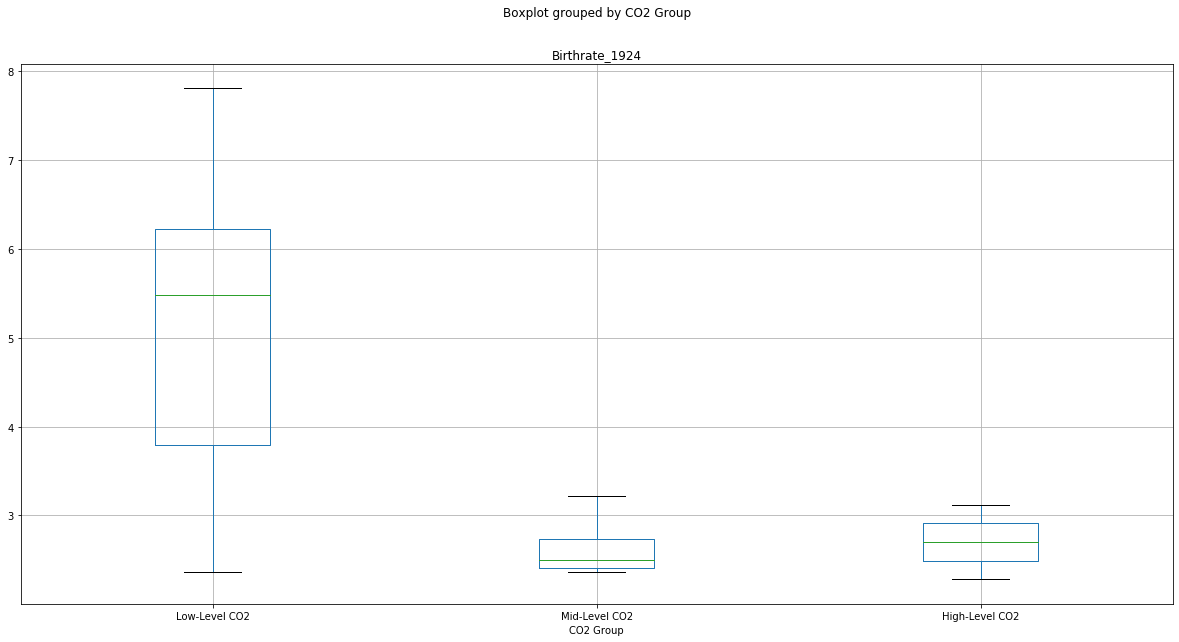

In [37]:
df_1924.boxplot("Birthrate_1924", by="CO2 Group", figsize=(20, 10))

In [41]:
group1 = df_1924[df_1924["CO2 Group"] == "Low-Level CO2"]["Birthrate_1924"]
group2 = df_1924[df_1924["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1924"]
group3 = df_1924[df_1924["CO2 Group"] == "High-Level CO2"]["Birthrate_1924"]

In [42]:
#perform the anova
#reject null hypothesis 
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=7.272371479240909, pvalue=0.0015026613905387187)

In [43]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1924)
population1 = df_1924[df_1924["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1924.mean()

5.061428571428573

In [44]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1924)
population2 = df_1924[df_1924["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1924.mean()

2.6425

In [45]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1924)
population3 = df_1924[df_1924["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1924.mean()

2.7

In [46]:
#calculate independent (two sample) t-test, low v mid (1924)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1924, population2.Birthrate_1924, equal_var=False)

Ttest_indResult(statistic=8.560282812339935, pvalue=2.025233355306293e-06)

In [47]:
#calculate independent (two sample) t-test, low v high (1924)
#fail to reject null hypothesis
stats.ttest_ind(population1.Birthrate_1924, population3.Birthrate_1924, equal_var=False)

Ttest_indResult(statistic=5.066430595598681, pvalue=0.06298762835880907)

In [48]:
#calculate independent (two sample) t-test, mid v high (1924)
#fail to reject null hypothesis
stats.ttest_ind(population2.Birthrate_1924, population3.Birthrate_1924, equal_var=False)

Ttest_indResult(statistic=-0.12389069652687118, pvalue=0.9162017924300669)

In [49]:
df_1934.describe()

,1934 CO2 Emissions,Birthrate_1934
count,79.000000,79.000000
mean,1.770683,4.575823
std,2.451523,1.826188
min,0.001680,1.680000
25%,0.114000,2.830000
50%,0.944000,4.390000
75%,2.230000,6.235000
max,11.100000,7.480000


In [50]:
bins = [0, 4, 8, 12]
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [51]:
pd.cut(df_1934["1934 CO2 Emissions"], bins, labels=group_labels)

0     High-Level CO2
1     High-Level CO2
2     High-Level CO2
3     High-Level CO2
4      Mid-Level CO2
           ...      
74     Low-Level CO2
75     Low-Level CO2
76     Low-Level CO2
77     Low-Level CO2
78     Low-Level CO2
Name: 1934 CO2 Emissions, Length: 79, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [52]:
df_1934["CO2 Group"] = pd.cut(df_1934["1934 CO2 Emissions"], bins, labels=group_labels)
df_1934 

,Country,1934 CO2 Emissions,Birthrate_1934,CO2 Group
0,United States,11.10000,2.07,High-Level CO2
1,Trinidad and Tobago,10.90000,4.23,High-Level CO2
2,Belgium,9.08000,2.04,High-Level CO2
3,United Kingdom,9.06000,1.76,High-Level CO2
4,Canada,7.28000,2.80,Mid-Level CO2
...,...,...,...,...
74,Tunisia,0.00670,6.30,Low-Level CO2
75,Syria,0.00408,6.97,Low-Level CO2
76,Madagascar,0.00201,7.04,Low-Level CO2
77,Thailand,0.00183,6.27,Low-Level CO2


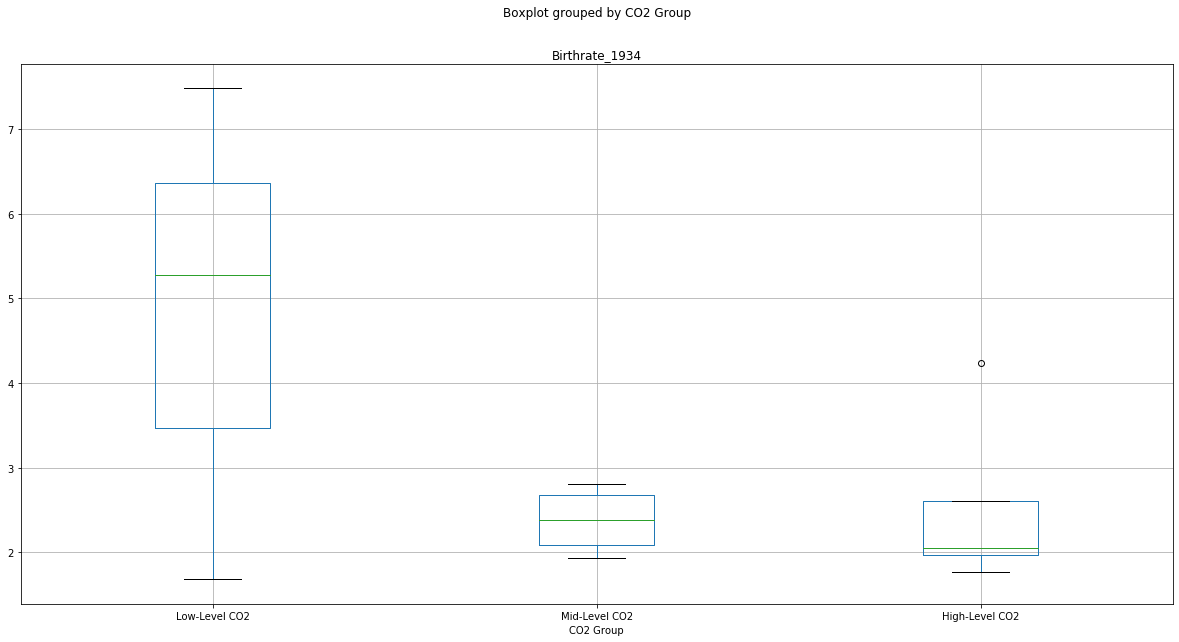

In [53]:
df_1934.boxplot("Birthrate_1934", by="CO2 Group", figsize=(20, 10))

In [54]:
group1 = df_1934[df_1934["CO2 Group"] == "Low-Level CO2"]["Birthrate_1934"]
group2 = df_1934[df_1934["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1934"]
group3 = df_1934[df_1934["CO2 Group"] == "High-Level CO2"]["Birthrate_1934"]

In [55]:
#perform the anova
#reject null hypothesis
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=6.960565650887615, pvalue=0.0016755968893190074)

In [56]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1934)
population1 = df_1934[df_1934["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1934.mean()

4.815352112676057

In [57]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1934)
population2 = df_1934[df_1934["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1934.mean()

2.375

In [58]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1934)
population3 = df_1934[df_1934["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1934.mean()

2.525

In [59]:
#calculate independent (two sample) t-test, low v mid (1934)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1934, population2.Birthrate_1934, equal_var=False)

Ttest_indResult(statistic=8.374305098695734, pvalue=2.4024927269520057e-06)

In [60]:
#calculate independent (two sample) t-test, low v high (1934)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1934, population3.Birthrate_1934, equal_var=False)

Ttest_indResult(statistic=3.7591258361148783, pvalue=0.02127256626021085)

Ttest_indResult(statistic=-0.24678196820164183, pvalue=0.8179959571080806)

In [62]:
df_1944.describe()

,1944 CO2 Emissions,Birthrate_1944
count,81.000000,81.000000
mean,3.195757,4.558519
std,8.196922,1.811189
min,0.000850,1.720000
25%,0.130000,2.930000
50%,0.953000,4.790000
75%,2.540000,6.160000
max,64.800000,7.880000


In [63]:
bins = [0, 8.7, 17.3, 26]
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [64]:
pd.cut(df_1944["1944 CO2 Emissions"], bins, labels=group_labels)

0                NaN
1     High-Level CO2
2     High-Level CO2
3      Mid-Level CO2
4      Mid-Level CO2
           ...      
76     Low-Level CO2
77     Low-Level CO2
78     Low-Level CO2
79     Low-Level CO2
80     Low-Level CO2
Name: 1944 CO2 Emissions, Length: 81, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [65]:
df_1944["CO2 Group"] = pd.cut(df_1944["1944 CO2 Emissions"], bins, labels=group_labels)
df_1944 

,Country,1944 CO2 Emissions,Birthrate_1944,CO2 Group
0,Brunei,64.80000,7.41,NaN
1,Bahrain,25.80000,7.02,High-Level CO2
2,Trinidad and Tobago,19.70000,5.16,High-Level CO2
3,United States,17.30000,2.44,Mid-Level CO2
4,Canada,11.50000,3.00,Mid-Level CO2
...,...,...,...,...
76,Mozambique,0.00943,6.69,Low-Level CO2
77,Syria,0.00588,7.10,Low-Level CO2
78,Guatemala,0.00431,6.48,Low-Level CO2
79,Nicaragua,0.00342,6.60,Low-Level CO2


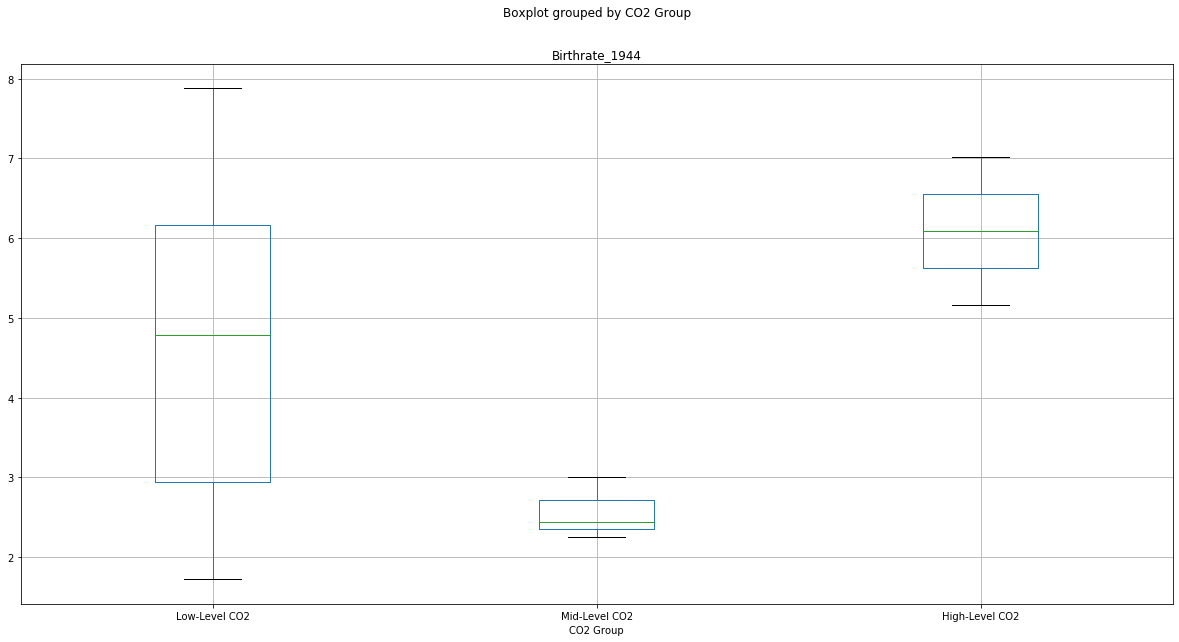

In [66]:
df_1944.boxplot("Birthrate_1944", by="CO2 Group", figsize=(20, 10))

In [67]:
group1 = df_1944[df_1944["CO2 Group"] == "Low-Level CO2"]["Birthrate_1944"]
group2 = df_1944[df_1944["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1944"]
group3 = df_1944[df_1944["CO2 Group"] == "High-Level CO2"]["Birthrate_1944"]

In [68]:
#perform the anova
#fail to reject null hypothesis
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.677961229734384, pvalue=0.07510031034686536)

In [69]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1944)
population1 = df_1944[df_1944["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1944.mean()

4.559466666666667

In [70]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1944)
population2 = df_1944[df_1944["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1944.mean()

2.563333333333333

In [71]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1944)
population3 = df_1944[df_1944["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1944.mean()

6.09

In [72]:
#calculate independent (two sample) t-test, low v mid (1944)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1944, population2.Birthrate_1944, equal_var=False)

Ttest_indResult(statistic=6.540853676846495, pvalue=0.00040466884409067925)

In [73]:
#calculate independent (two sample) t-test, low v high (1944)
#fail to reject null hypothesis
stats.ttest_ind(population1.Birthrate_1944, population3.Birthrate_1944, equal_var=False)

Ttest_indResult(statistic=-1.6067702443919696, pvalue=0.33753581433843377)

In [74]:
#calculate independent (two sample) t-test, mid v high (1944)
#fail to reject null hypothesis
stats.ttest_ind(population2.Birthrate_1944, population3.Birthrate_1944, equal_var=False)

Ttest_indResult(statistic=-3.6856729168338163, pvalue=0.14755119108233572)

In [75]:
df_1954.describe()

,1954 CO2 Emissions,Birthrate_1954
count,137.000000,137.000000
mean,2.243838,5.343796
std,3.895850,1.738697
min,0.004410,2.060000
25%,0.174000,3.610000
50%,0.510000,5.970000
75%,2.650000,6.730000
max,29.000000,7.660000


In [76]:
bins = [0, 6, 12, 18]
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [77]:
pd.cut(df_1954["1954 CO2 Emissions"], bins, labels=group_labels)

0                 NaN
1      High-Level CO2
2      High-Level CO2
3       Mid-Level CO2
4       Mid-Level CO2
            ...      
132     Low-Level CO2
133     Low-Level CO2
134     Low-Level CO2
135     Low-Level CO2
136     Low-Level CO2
Name: 1954 CO2 Emissions, Length: 137, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [78]:
df_1954["CO2 Group"] = pd.cut(df_1954["1954 CO2 Emissions"], bins, labels=group_labels)
df_1954 

,Country,1954 CO2 Emissions,Birthrate_1954,CO2 Group
0,Luxembourg,29.00000,2.06,NaN
1,Qatar,17.90000,6.97,High-Level CO2
2,United States,14.70000,3.49,High-Level CO2
3,United Kingdom,10.90000,2.26,Mid-Level CO2
4,Canada,10.70000,3.78,Mid-Level CO2
...,...,...,...,...
132,Ethiopia,0.01390,7.05,Low-Level CO2
133,Afghanistan,0.01310,7.53,Low-Level CO2
134,Guinea-Bissau,0.01290,6.05,Low-Level CO2
135,Swaziland,0.01220,6.69,Low-Level CO2


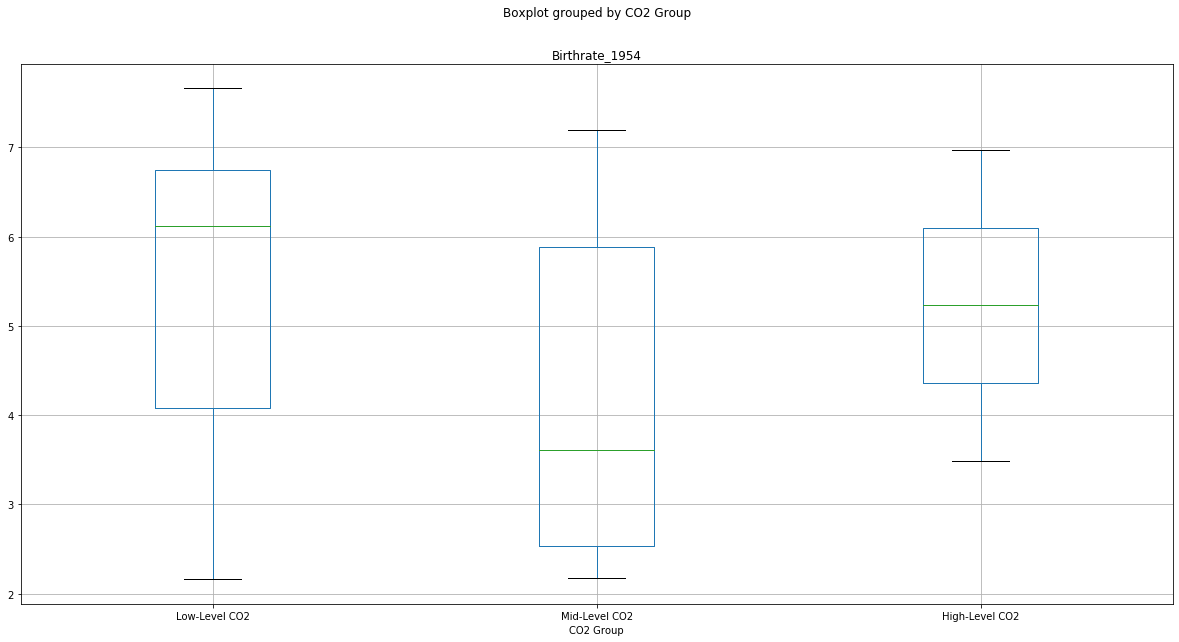

In [79]:
df_1954.boxplot("Birthrate_1954", by="CO2 Group", figsize=(20, 10))

In [80]:
group1 = df_1954[df_1954["CO2 Group"] == "Low-Level CO2"]["Birthrate_1954"]
group2 = df_1954[df_1954["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1954"]
group3 = df_1954[df_1954["CO2 Group"] == "High-Level CO2"]["Birthrate_1954"]

In [81]:
#perform the anova
#reject null hypothesis
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.08549437196602, pvalue=0.048994206618631214)

In [82]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1954)
population1 = df_1954[df_1954["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1954.mean()

5.484016393442624

In [83]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1954)
population2 = df_1954[df_1954["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1954.mean()

4.210833333333334

In [84]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1954)
population3 = df_1954[df_1954["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1954.mean()

5.23

In [85]:
#calculate independent (two sample) t-test, low v mid (1954)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1954, population2.Birthrate_1954, equal_var=False)

Ttest_indResult(statistic=2.250989142846485, pvalue=0.042702660498572124)

In [86]:
#calculate independent (two sample) t-test, low v high (1954)
#fail to reject null hypothesis
stats.ttest_ind(population1.Birthrate_1954, population3.Birthrate_1954, equal_var=False)

Ttest_indResult(statistic=0.1454387222418014, pvalue=0.9077847212079208)

In [87]:
#calculate independent (two sample) t-test, mid v high (1954)
#fail to reject null hypothesis
stats.ttest_ind(population2.Birthrate_1954, population3.Birthrate_1954, equal_var=False)

Ttest_indResult(statistic=-0.5589474923578889, pvalue=0.6621860132303483)

In [88]:
df_1964.describe()

,1964 CO2 Emissions,Birthrate_1964
count,165.000000,165.000000
mean,3.432159,5.552606
std,9.350475,1.774703
min,0.011600,1.830000
25%,0.184000,4.090000
50%,0.787000,6.150000
75%,3.490000,6.870000
max,92.900000,8.200000


In [89]:
bins = [0, 10.3, 31, 93]
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [90]:
pd.cut(df_1964["1964 CO2 Emissions"], bins, labels=group_labels)

0      High-Level CO2
1      High-Level CO2
2      High-Level CO2
3       Mid-Level CO2
4       Mid-Level CO2
            ...      
160     Low-Level CO2
161     Low-Level CO2
162     Low-Level CO2
163     Low-Level CO2
164     Low-Level CO2
Name: 1964 CO2 Emissions, Length: 165, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [91]:
df_1964["CO2 Group"] = pd.cut(df_1964["1964 CO2 Emissions"], bins, labels=group_labels)
df_1964

,Country,1964 CO2 Emissions,Birthrate_1964,CO2 Group
0,Qatar,92.9000,6.99,High-Level CO2
1,Kuwait,59.6000,7.38,High-Level CO2
2,Luxembourg,37.6000,2.37,High-Level CO2
3,United States,16.5000,3.22,Mid-Level CO2
4,Germany,12.8000,2.50,Mid-Level CO2
...,...,...,...,...
160,Oman,0.0181,7.26,Low-Level CO2
161,Ethiopia,0.0167,6.87,Low-Level CO2
162,Burundi,0.0158,7.14,Low-Level CO2
163,Nepal,0.0140,5.97,Low-Level CO2


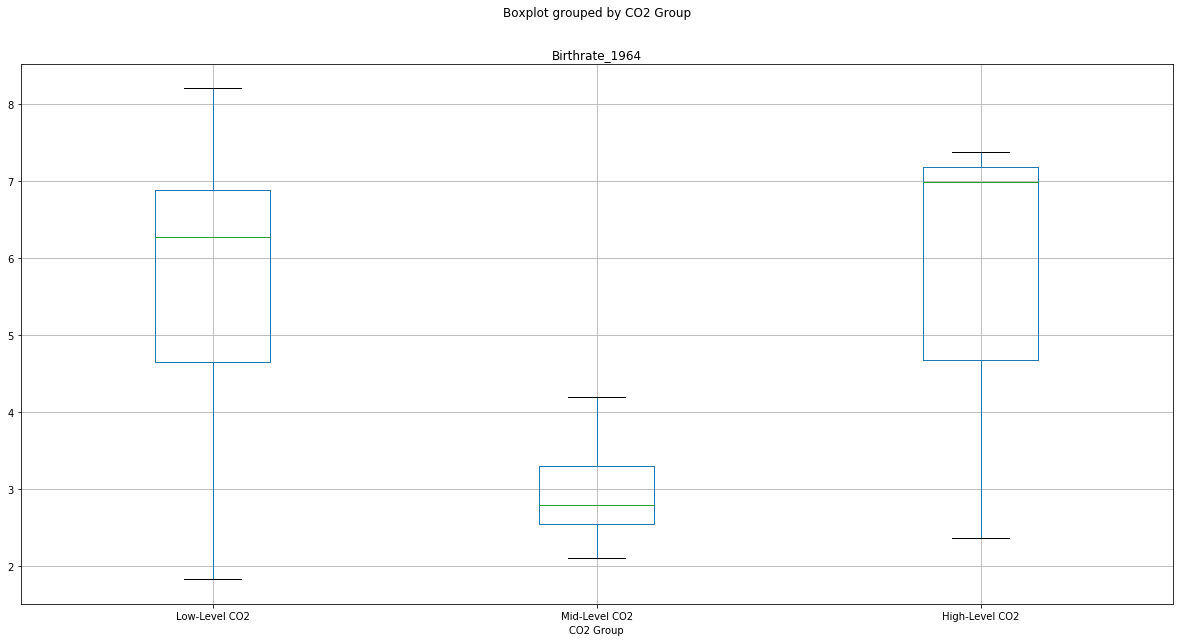

In [92]:
df_1964.boxplot("Birthrate_1964", by="CO2 Group", figsize=(20, 10))

In [93]:
group1 = df_1964[df_1964["CO2 Group"] == "Low-Level CO2"]["Birthrate_1964"]
group2 = df_1964[df_1964["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1964"]
group3 = df_1964[df_1964["CO2 Group"] == "High-Level CO2"]["Birthrate_1964"]

In [94]:
#perform the anova
#reject null hypothesis
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=8.45765608097125, pvalue=0.0003208247219774552)

In [95]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1964)
population1 = df_1964[df_1964["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1964.mean()

5.668774193548386

In [96]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1964)
population2 = df_1964[df_1964["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1964.mean()

2.968571428571429

In [97]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1964)
population3 = df_1964[df_1964["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1964.mean()

5.580000000000001

In [98]:
#calculate independent (two sample) t-test, low v mid (1964)
#reject null hypothesis
stats.ttest_ind(population1.Birthrate_1964, population2.Birthrate_1964, equal_var=False)

Ttest_indResult(statistic=9.15124273716388, pvalue=4.302611917338284e-06)

In [99]:
#calculate independent (two sample) t-test, low v high (1964)
#fail to reject null hypothesis
stats.ttest_ind(population1.Birthrate_1964, population3.Birthrate_1964, equal_var=False)

Ttest_indResult(statistic=0.054975943338372156, pvalue=0.9610916812990395)

In [100]:
#calculate independent (two sample) t-test, mid v high (1964)
#fail to reject null hypothesis
stats.ttest_ind(population2.Birthrate_1964, population3.Birthrate_1964, equal_var=False)

Ttest_indResult(statistic=-1.6020913172260318, pvalue=0.24409029087701173)

In [ ]:
#anova test yields reject null hypothesis for almost all years. 
#when we run independent t-test, it's reject null hypothesis for low vs mid CO2 levels, but it's fail to reject null hypothesis for low vs high & mid vs high C02 groups. 